# Capital Asset Model Pricing

The capital asset pricing model (CAPM) tells us about the relationship between risk and return in the security market as a whole, assuming that investors act in accordance with **Mean Variance Portfolio** theory and that the market is in equilibrium

The assumptions of CAPM are: 
- All investors have the same one-period horizon. 
- All investors can borrow or lend unlimited amounts at the same risk-free rate. 
- The markets for risky assets are perfect. Information is freely and instantly available to all investors and no investor believes that they can affect the price of a security by their own actions. 
- Investors have the same estimates of the expected returns, standard deviations and covariances of securities over the one-period horizon. 
- All investors measure in the same “currency” eg pounds or dollars or in “real” or “money” terms.

$E_i = r+\beta_i (E_M - r)$ where;
- $E_i$ is the expected return on security i, 
- $r$ is the return on the risk-free asset, 
- $E_M$ is the expected return on the market portfolio, 
- $\beta_i$ is the beta factor of security i defined as $Cov[R_i,R_M]/V_M$

**OR** 

$r_i(t) = \beta_i r_m(t) + \alpha_i(t)$ where; 

- $i$ is an individual stock

- $r_i(t)$ = return of stock ‘i’ at time ‘t’

- $β_i$ = beta of ‘i’

- $r_m(t)$ = return of market ‘m’ at time ‘t’

- $α_i(t)$ = alpha of ‘i’ at time ‘t’

$β$ of a stock $i$ tells us about the risk the stock will add to the portfolio in comparison to the market. $β=1$ means that the stock is in line with the market.

According to CAPM, the value of α is expected to be zero and that it is very random and cannot be predicted.

In [17]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib import pyplot as plt
from scipy import stats
import warnings

plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
ticker1 = 'SPY'
ticker2 = 'FB'
source = 'yahoo'

In [6]:
spy = web.DataReader(ticker1, source, start='2013-01-01', end='2020-01-01')
facebook = web.DataReader(ticker2, source, start='2013-01-01', end='2020-01-01')

Run this code incase you encounter errors while downloading your data and restart your kernel.
        
        pip install pandas-datareader --upgrade
        pip install pandas --upgrade

In [7]:
spy.to_csv('SPY.csv')
facebook.to_csv('Facebook.csv')

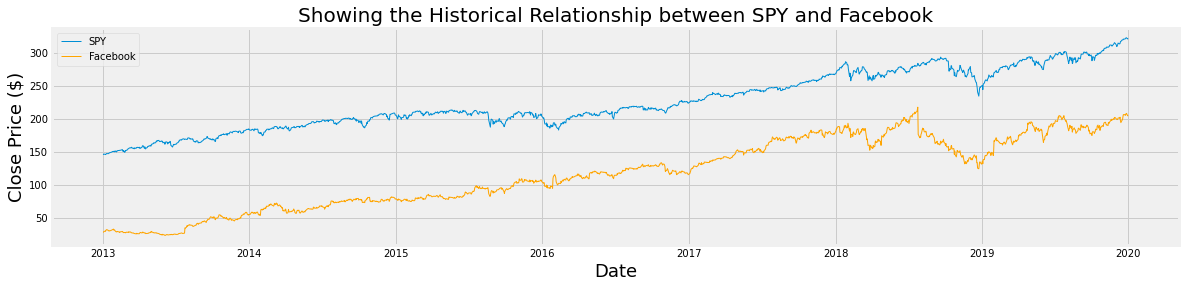

In [23]:
plt.figure(figsize=(18,4))
plt.title('Showing the Historical Relationship between SPY and Facebook', fontsize=20)
plt.plot(spy['Close'], linewidth=1, label='SPY')
plt.plot(facebook['Close'], linewidth=1, color='orange', label='Facebook')
plt.ylabel('Close Price ($)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.show()

We can say here that the stock is mimicking the market perfomance.

## Stats

### cumulative return relationship

In [28]:
spy['Cumulative Return'] = spy['Close']/spy['Close'].iloc[0]
facebook['Cumulative Return'] = facebook['Close']/facebook['Close'].iloc[0]

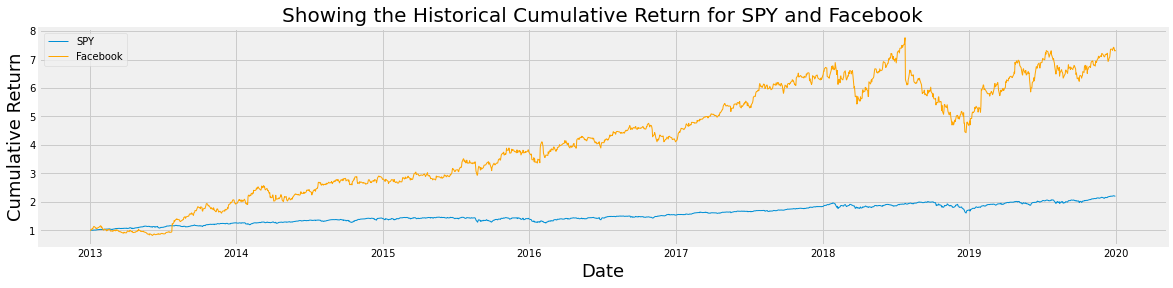

In [35]:
plt.figure(figsize=(18,4))
plt.title('Showing the Historical Cumulative Return for SPY and Facebook', fontsize=20)
plt.plot(spy['Cumulative Return'], linewidth=1, label='SPY')
plt.plot(facebook['Cumulative Return'], linewidth=1, color='orange', label='Facebook')
plt.ylabel('Cumulative Return', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.show()

### daily return relationship

In [36]:
spy['Daily Return'] = spy['Close'].pct_change(1)
facebook['Daily Return'] = facebook['Close'].pct_change(1)

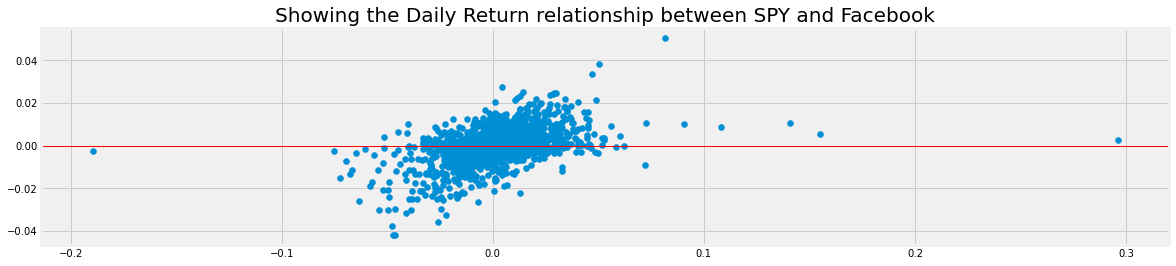

In [51]:
plt.figure(figsize=(18,4))
plt.title('Showing the Daily Return relationship between SPY and Facebook', fontsize=20)
plt.scatter(facebook['Daily Return'], spy['Daily Return'])
plt.axhline(linewidth=1, color='red')
plt.show()

**Finding alpha and beta values**

The alpha and beta values are found by using the stats package of scipy and calling the linear regression function of it. While finding the daily returns, the first row has NaN values and therefore while passing the columns for linear regression everything from the first row is considered.

In [52]:
LR = stats.linregress(facebook['Daily Return'].iloc[1:], spy['Daily Return'].iloc[1:])

In [53]:
LR

LinregressResult(slope=0.18892458134820578, intercept=0.00022889292467803598, rvalue=0.4776579195809863, pvalue=4.797151469053647e-101, stderr=0.00828520056518826, intercept_stderr=0.0001699656725600135)

In [54]:
beta,alpha,r_val,p_val,std_err = LR

In [59]:
print(f"Our alpha value {alpha}, is close to zero which is good. \n\nWe have a beta value of {beta}. \nThis is really low. Facebook stock isn't really perfoming well with the market")

Our alpha value 0.00022889292467803598, is close to zero which is good. 

We have a beta value of 0.18892458134820578. 
This is really low. Facebook stock isn't really perfoming well with the market
